YAPAY SİNİR AĞLARI

- insan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.
-  sinir ağları bir araya gelerek bir araya gelerek sistemi oluşturur.
- "çok katmanlı ağ" olarak da adlandırılır.
- Ağın yapısına karar verilir.
- Doğrusal değişkenler ,doğrusal olmayan değişkenlerden türetilmektedir.
- Girdiler ve çıktılar üzerinden olabilicek en min hatayı bulmayı amaçlar
- overfit olmaya meyillidir.bundan kurtulamk için birçok yol denenir.
-


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [4]:
import numpy as np
import pandas as pd
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
X_train_scaled = scaler.transform(X_train)

In [8]:
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.neural_network import MLPRegressor

In [10]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [12]:
mlp_model.n_layers_

4

In [13]:
mlp_model.hidden_layer_sizes

(100, 20)

In [14]:
#tahmin
mlp_model.predict(X_train_scaled)[0:5]

array([ 64.31825083, 257.55051543, 177.07176532,  57.13426873,
        38.01927089])

In [15]:
y_pred = mlp_model.predict(X_test_scaled)

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(519.8090158218371)

In [17]:
#model tuning
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [18]:
mlp_params = {'alpha':[0.1,0.01,0.02,0.005],'hidden_layer_sizes':[(20,20),(100,50,150),(300,200,150)],'activation':['relu','logistic']}

In [19]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=10)

In [20]:
#mlp_cv_model.fit(X_train_scaled, y_train)

In [21]:
mlp_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
mlp_tuned = MLPRegressor(alpha=0.02,hidden_layer_sizes=(100,50,150))

In [42]:
mlp_tuned.fit(X_train_scaled,y_train)

NameError: name 'mlp_tuned' is not defined

In [ ]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(357.782237425398)

CLASSİFİCATİON AND REGRESSİON TREES(CART)(KARAR AĞAÇLARI)

- amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektedir.
- Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.
- genel olarak belirli koşullarla ağaç yapısı üzerinden kısıtlamalar yer alır ve duruma göre ksııtlar takip edilerek sonuca ulaşılır.
- overfitting durumu burada da mevcuttur.
- karmaşıklık parametresi yer alır ve belli bir noktada dallanmaları durdurur.


In [ ]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [ ]:
cart_model

DecisionTreeRegressor(max_leaf_nodes=10)

In [ ]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_35043/1457480431.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


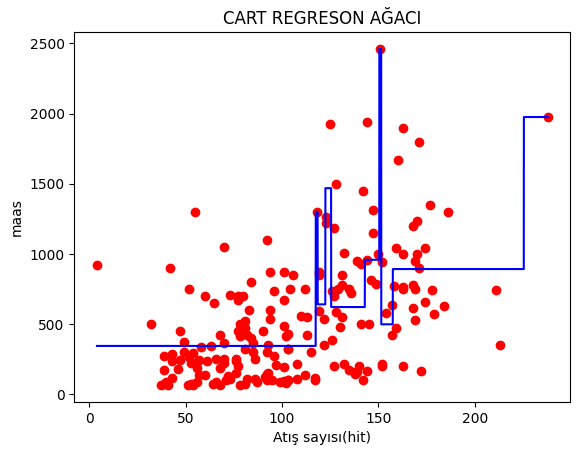

In [ ]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_grid,cart_model.predict(X_grid),color = 'blue')
plt.title('CART REGRESON AĞACI')
plt.xlabel('Atış sayısı(hit)')
plt.ylabel("maas");

In [ ]:
!pip install skompiler

  Using cached SKompiler-0.7.tar.gz (45 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54312 sha256=693285feeb64303ed2ab78d246b862d31cfd9e4bb638f2b31eb5c88d7ca17f12
  Stored in directory: /Users/mehmetsenel/Library/Caches/pip/wheels/2c/07/8e/31a604c05bb571a174e617084ebaf2abd646059d584621860a
Successfully built skompiler


In [ ]:
!pip install astor

  Using cached astor-0.8.1-py2.py3-none-any.whl.metadata (4.2 kB)
Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)


In [ ]:
from skompiler import skompile

In [ ]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



In [ ]:
#Tahmin
x = [91]
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [ ]:
cart_model.predict(X_test)[0:10]


array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517, 345.20115517, 892.54024138, 958.61111111,
       892.54024138, 345.20115517])

In [ ]:
cart_model.predict([[91]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([345.20115517])

In [ ]:
y_pred = cart_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(486.34593105235456)

In [ ]:

cart_model = DecisionTreeRegressor()
cart_model.fit(X_train,y_train)
y_pred = cart_model.predict(X_test)



In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(468.49579052913884)

In [ ]:
cart_params = {"min_sample_split": range(2,100), "max_leaf_nodes": range(2,10)}

In [ ]:
cart_cv_model = GridSearchCV(cart_model, cart_params ,cv=10)

In [ ]:
#cart_cv_model.fit(X_train,y_train)

In [ ]:
cart_cv_model

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_sample_split': range(2, 100)})

In [ ]:
cart_cv_model.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_sample_split': range(2, 100)})>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
cart_model = DecisionTreeRegressor(max_leaf_nodes=2)

# Define the parameter grid with the correct parameter name
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]  # Corrected to 'min_samples_split'
}

# Set up GridSearchCV with the model and parameters
cart_cv_model = GridSearchCV(cart_model, param_grid=param_grid, cv=5)

# Fit the model to the training data
cart_cv_model.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_leaf_nodes=2),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
cart_cv_model.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [ ]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9,min_samples_split=76)

In [ ]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [ ]:
y_pred = cart_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(423.406689243066)

BAGGING

- temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
- çalışma prensibi : t adet ağaç oluşturulur ve n'er adet gözlem(n < m) olacak şekilde seçilir.sonuç olarak t adet tahmin değeri bir araya gelmiş olur.
 

In [ ]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train,y_train)

BaggingRegressor(bootstrap_features=True)

In [ ]:
bag_model.n_estimators

10

In [ ]:
bag_model.estimator_

DecisionTreeRegressor()

In [ ]:
bag_model.estimators_samples_

[array([135, 171,   4, 149,  52, 181, 179, 172,  44, 133,  49,  37, 158,
        110, 157, 155,   7, 180, 146,  42,  54, 170,   8,  67, 193, 141,
        191,  45, 159, 115,  25, 125, 117,  39,  46, 180,  35,   0, 172,
        162, 151,  71,   5,   5,  80,  87, 123,  57, 166,  31, 145,  38,
        101,  81,  54, 190,  37, 113,  36,  47, 106,  80,  92,  98, 104,
        107, 107, 157,  36,  68,  58,  24, 172,  99, 171, 116, 104,  77,
         33,  64, 172,  87,   8,  96, 146,  95,  84,  16,  42, 172, 196,
        166, 115, 101, 191, 135, 104,  20, 124, 185, 117,  91,  36, 168,
        145,   5, 170,  23, 131, 137,  16,  90,  48, 121, 196, 195,  69,
          2,  48, 119, 115,   0, 142, 191, 190, 133, 175,  50, 175, 154,
         60,  32,  63,  49,  11,  85, 133,   3, 102, 124,  29,   4, 124,
         46,  38,  89, 183, 139, 177,  16, 163,  24,  98,  96, 178,  12,
          2, 148,  86, 143, 163, 187, 147,  53, 166,  50,  86,   8, 164,
        106,  14, 129, 144,  56,  78, 115,  90,  76

In [ ]:
bag_model.estimators_features_

[array([ 9,  2,  8, 10, 16,  0,  1,  3, 18, 10, 18, 10, 12, 13,  2, 15, 12,
        16, 12]),
 array([ 3, 10,  9,  7,  6, 13,  6,  1, 15, 10,  8,  3, 18, 15,  6,  1,  9,
        12, 10]),
 array([12,  3, 11,  4,  1,  4,  3, 13,  9, 16, 16,  3, 18, 18,  8,  0,  0,
         3, 10]),
 array([17,  9, 12,  7, 18,  9,  0,  9,  7,  8,  9,  6, 10, 17,  7, 16, 17,
         0,  6]),
 array([12, 14, 10, 16,  7, 18,  6, 16,  9,  3, 18, 10,  1, 15,  4, 17, 18,
        18, 12]),
 array([ 2,  7,  4,  1,  9,  1,  2,  5, 16,  2,  8,  7, 12, 16, 15, 18, 15,
        12,  7]),
 array([ 3,  0,  3, 16,  1, 17, 10,  6, 12,  6,  9, 16, 12,  9,  9,  1,  3,
         1,  5]),
 array([ 7, 17, 12, 10,  0,  6,  5, 14, 17, 18, 13,  7,  0, 18,  6,  7,  5,
         8, 15]),
 array([10, 18,  1, 10,  7, 16, 18, 10, 12, 15,  6, 17,  6, 13,  0,  0,  1,
         2, 13]),
 array([ 3, 12,  2,  4, 14, 10, 11,  1, 17,  0, 10,  3, 17,  6, 13, 15,  8,
        12, 14])]

In [ ]:
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=402708731)

In [ ]:
y_pred =bag_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(337.6644880940219)

In [ ]:
iki_y_pred = bag_model.estimators_[1].fit(X_train,y_train).predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,iki_y_pred))

np.float64(468.3540224454341)

In [ ]:
#model tuning
bag_params = {"n_estimators":range(2,20)}

In [ ]:
bag_cv_model = GridSearchCV(bag_model,bag_params,cv=10)

In [ ]:
bag_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [ ]:
bag_cv_model.best_params_

{'n_estimators': 18}

In [ ]:
bag_tuned = BaggingRegressor(n_estimators=14,random_state=45)

In [ ]:
bag_tuned.fit(X_train,y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [ ]:
y_pred = bag_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(346.457987188104)

RANDOM FORESTS(RF)

- temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
- baggin ve random subspace yöntemlerinin birleştirilmesi ile oluşmuştur.
- gözlemler = bootstrap ile değişkenler = random subspace ile seçilir.
- karar ağacının her bir düğümünde en iyi dallara ayırıcı değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir
- ağaç oluşturmada veri setinni 2/3 ' ü kullanılır.
- her düğüm noktasında rastgele değişken seçimi yapılır.(regresyonda p/3,sınıflamada karekök p)
- nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları gözönüne alınarak ağaçlara ağırlık verilir.


In [ ]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1180.145  ,  139.65167,  634.60833])

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(344.8719613101134)

In [ ]:
rf_params = {'max_depth':list(range(1,10)),'max_features':[3,5,10,15],'n_estimators' :
             [100,200,500,1000]}

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv = 10,n_jobs=-1)

In [ ]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000]})

In [ ]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [ ]:
rf_tuned = RandomForestRegressor(max_depth=8,max_features=3,n_estimators=200)

In [ ]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(350.733467751858)

In [ ]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                          index= X_train.columns)

<Axes: >

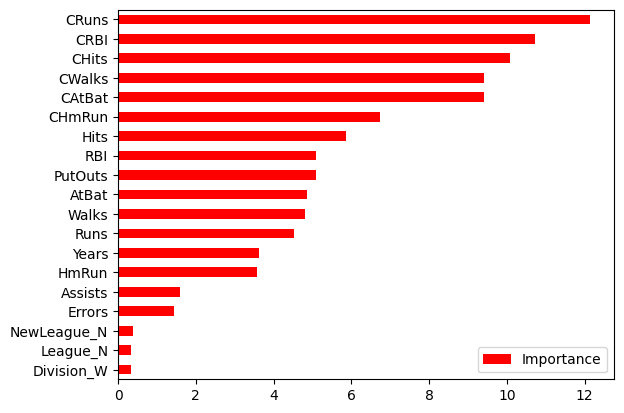

In [ ]:
Importance.sort_values(by = "Importance",axis=0,ascending=True).plot(kind="barh",color = "r")

Gradient Boosting Machines

- adaboostun sınıflandırma ve regresyon problemlerinde kolayca uyarlanabilen genelleştirilmiş versiyonudur.
- artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.
- yöntem girişi ; zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak amacıyla oluşmuştur.
- AdaBoost : zayıf sınıflandırıcıları bir araya getirerek güçlü bir sınıflandırıcı oluşturulması fikrinin hayata çıkarılması olayıdır.
- Ağacların birbirine bağımlılığı mevcuttur.


Özellikler:
- tek bşr tahminsel model formunda olan modeller serisi oluşturur.
- seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarını/hatalarının üzerine kurularak oluşturulur.
- GBM diferansiyellenebilen herhangi bir kayıp fonksiyonu optimize edebilen Gradient descent algoritmasını kullanır.
- Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(347.57777045588335)

In [ ]:
gbm_params = {
    'learning_rate' : [0.001,0.01,0.1,0.2],
    'max_depth' : [3,5,8,50,100],
    'n_estimators' : [200,500,1000,2000],
    'subsample' : [1,0.5,0,75]
}

In [ ]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2)
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.2s
[

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1600 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0, 75]},
             verbose=2)

In [ ]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 500, 'subsample': 0.5}

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=200,subsample=0.5)
gbm_tuned = gbm_tuned.fit(X_train,y_train)


In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(328.9967228123093)

eXtreme Gradient Boosting(XGBoost)

- XGBoost , GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiştir.
- ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
- ölçeklebilirdir.
- hızlıdır, tahmin başarısı yüksektir.


In [22]:
# Load the data
hit = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/Hitters.csv")
df = hit.copy()

# Drop missing values
df = df.dropna()

# Convert categorical variables to dummy variables
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Define the target and features
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Concatenate the dummy variables correctly
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
pip install xgboost --no-binary xgboost -v


Using pip 24.3.1 from /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pip (python 3.13)
Note: you may need to restart the kernel to use updated packages.


In [29]:
import xgboost as xgb

In [30]:
DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test = xgb.DMatrix(data= X_test, label=y_test)

In [31]:
from xgboost import XGBRFRegressor

In [32]:
xgb = XGBRFRegressor()

In [36]:
xgb_model = XGBRFRegressor().fit(X_train,y_train)

In [37]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(350.72090418503535)

In [38]:
xgb_model

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [39]:
xgb_grid = {
    'colsample_bytree': [0.4,0.5,0.6,0.9,1],
    'n_estimators': [100,200,500,1000],
    'max_depth' : [2,3,4,5,6],
    'learning_rate' : [0.1,0.01,0.5]
}

In [41]:
xgb = XGBRFRegressor()
xgb_cv = GridSearchCV(xgb,param_grid= xgb_grid,cv=10,n_jobs=-1,verbose=2)
xgb_cv.fit(X_train,y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.4, lear

GridSearchCV(cv=10,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max...
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [43]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.5,
 'max_depth': 6,
 'n_estimators': 1000}

In [45]:
from xgboost import XGBRegressor
xgb_tuned = XGBRegressor(colsample_bytree = 0.6,
                           learning_rate = 0.5,
                           max_depth=2,
                           n_estimators = 1000)
xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [46]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(333.1804637184929)

Light GBM
- xgboostun eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.
- daha performanslıdır, leaf-wise büyüme stratejisini kullanır.
- BFS yerine DFS kullanılır.süreyi kısaltmak odaklı çalışır.

CATEGORY BOOSTİNG (CatBoost)

- kategorik değişkenler ile otomatik olarak mücadele edebilen , hızlı , bşaarılı bir diğer GBM tüverividr.
- yandex taarfından geliştirilmiştir.
- kategorik değişken desteği yer alır.
- hızlı ve ölçeklenebilir GPU desteği yer alır.
- rusyanın ilk açık kaynaklı kodudur.